<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/%EC%9D%B8%EA%B5%AC_%EC%86%8C%EB%93%9D_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


In [ ]:
train.columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


In [ ]:
#데이터프레임(DataFrame)의 범주형 변수들에 대한 기술 통계량(descriptive statistics) 출력하기

train_drop = train.drop(['id'],axis = 1)
train_drop.describe(include=['object'])

# target의 최빈값(mode) 추출
mode_target = train['target'].mode()[0]

# 최빈값으로 submission 채우기
submission['target'] = mode_target
submission.head()

submission.to_csv('submission.csv', index = False)

In [ ]:
# EDA
# Target의 분포 확인

# 시각화에 필요한 라이브러리 Import

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.font_manager as fm

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 그래프 스타일 설정
plt.style.use("ggplot")

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

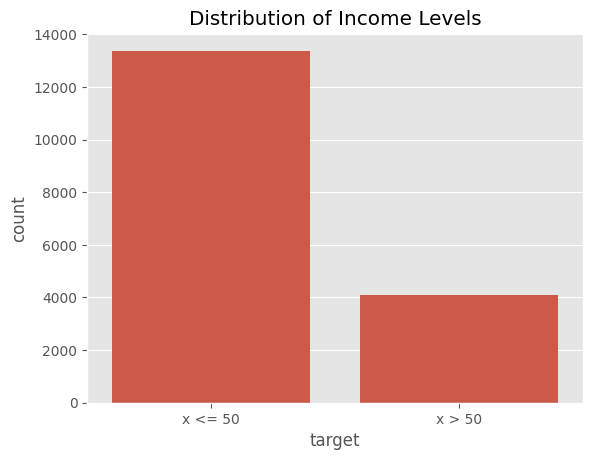

In [ ]:
# 소득 수준(target)에 따른 데이터 분포를 막대 그래프로 시각화합니다.
axs = sns.countplot(x="target", data=train)

# x 축 레이블과 눈금 설정
axs.set_xticklabels(labels = ["x <= 50", "x > 50"])

# 그래프 제목 설정
axs.set_title("Distribution of Income Levels")

# 그래프 표시
plt.show()

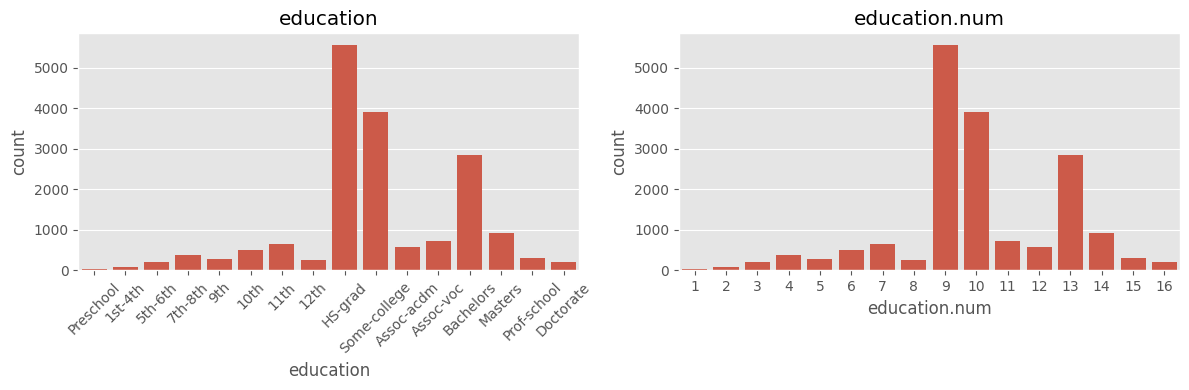

In [ ]:
#### 교육수준의 분포

# 그림 크기 설정
fig, axs = plt.subplots(figsize=(12, 4), ncols=2)

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']

# 첫 번째 subplot: education 카테고리 시각화
sns.countplot(x="education", data=train, order=orders, ax=axs[0])
axs[0].set_xticklabels(labels = orders, rotation=45)
axs[0].set_title('education')

# 두 번째 subplot: education.num 카테고리 시각화
sns.countplot(x="education.num", data=train, ax=axs[1])
axs[1].set_title('education.num')

# subplot 간 간격 조정
plt.tight_layout()

plt.show()

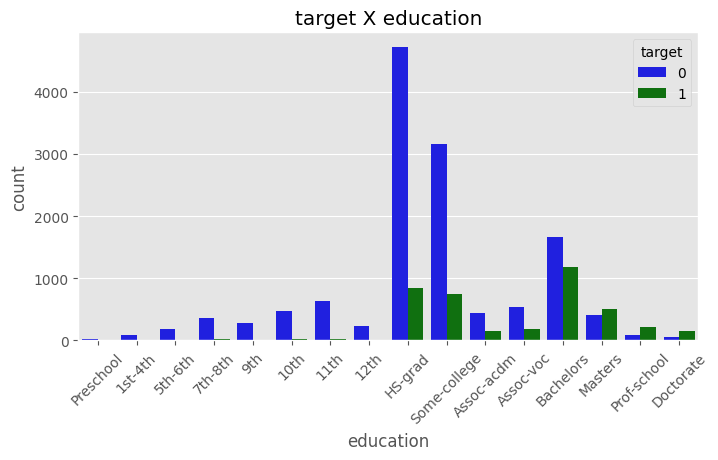

In [ ]:
####5.교육 수준(education)에 따른 소득 수준(target) 분포

plt.subplots(figsize=(8, 4))

orders = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th',
'HS-grad','Some-college','Assoc-acdm','Assoc-voc','Bachelors','Masters','Prof-school','Doctorate']
palette_used = ['blue', 'green']

axs = sns.countplot(x="education", data=train, hue='target', order=orders, palette=palette_used)
axs.set_title('target X education')
axs.set_xticklabels(labels=orders, rotation=45)
plt.show()

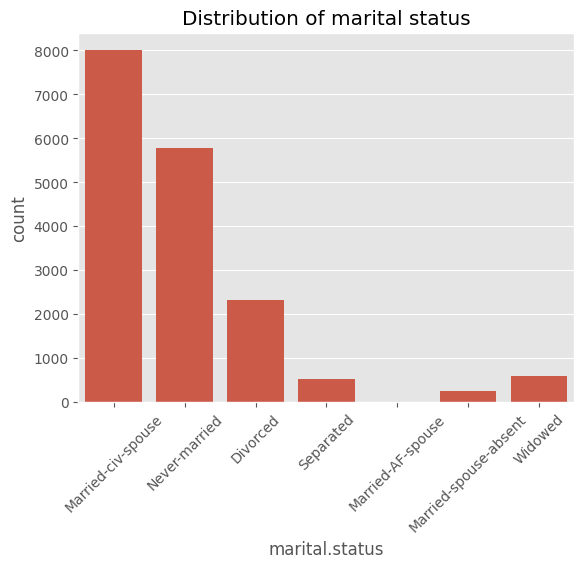

In [ ]:
###결혼 상태(marital.status)의 분포

sns.countplot(x="marital.status", data=train)
plt.xticks(rotation=45)
plt.title('Distribution of marital status')
plt.show()

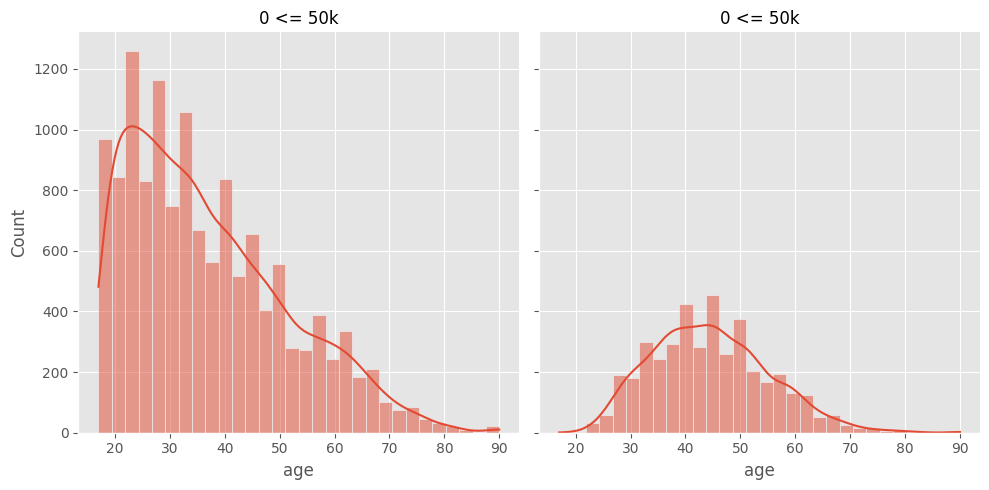

In [ ]:
###9.나이(age)의 분포

g = sns.displot(data=train, x="age", col="target", kde=True, bins=30)
g.set_titles("0 <= 50k", "0 > 50k")
plt.show()

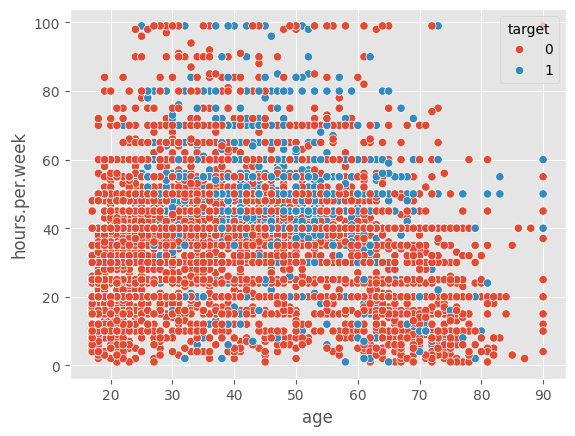

In [ ]:
## #주당 근무 시간(hours.per.week)과 나이(age)의 관계

sns.scatterplot(data=train, x="age", y="hours.per.week", hue="target")
plt.show()

In [ ]:
# 결측값 제거 전후 데이터 확인

display("-----결측값 제거 전-----", train.isnull().sum())

train_dropna = train.dropna()

display("-----결측값 제거 후-----", train_dropna.isnull().sum())

'-----결측값 제거 전-----'

id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
target               0
dtype: int64

'-----결측값 제거 후-----'

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
target            0
dtype: int64

In [ ]:
# 독립변수 종속변수 설정

x = train_dropna.drop(['target','id'], axis=1)
y = train_dropna['target']

In [ ]:
#train_test_split을 사용한 (train / validation) 분할

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=24)

#5. 분할된 (train / validation) 데이터의 shape 확인¶
print('X_train 데이터 사이즈', x_train.shape)
print('X_valid 데이터 사이즈', x_valid.shape)
print(" ")
print('y_train 데이터 사이즈', y_train.shape)
print('y_valid 데이터 사이즈', y_valid.shape)

X_train 데이터 사이즈 (10556, 14)
X_valid 데이터 사이즈 (4525, 14)
 
y_train 데이터 사이즈 (10556,)
y_valid 데이터 사이즈 (4525,)


In [ ]:
##LabelEncoder를 사용한 범주형 데이터 인코딩

from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in x_train.columns:
    if x_train[col].dtype == 'object':

        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col]) # 학습 데이터에 대해 LabelEncoder를 적용하고 변환

        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(x_valid[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        x_valid[col] = le.transform(x_valid[col]) # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [ ]:
## RandomForestClassifier 모델을 사용한 valid 데이터 예측 및 평가

from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(x_valid)

In [ ]:
##RandomForest 모델의 Macro F1 스코어 계산 및 출력

from sklearn.metrics import f1_score

# Macro F1 스코어 계산 (0에서 1 , 1가까울 수록 굿)
# F1 = 2*(Precision * Recall) / (Precision + Recall)
macro_f1 = f1_score(y_valid, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.7842079820526908


In [ ]:
## 데이터 분할 및 train/valid 데이터 준비

train= pd.read_csv('train.csv')

x = train.drop(['target'], axis =1)
y = train['target']

train_data, valid_data, train_targets, valid_targets = train_test_split(x, y, test_size = 0.3, random_state = 42)



In [ ]:
## 결측값 보간(Imputer)을 통한 데이터 전처리

from sklearn.impute import SimpleImputer

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='most_frequent')

train_data[['occupation','workclass']] = imputer.fit_transform(train_data[['occupation','workclass']])
valid_data[['occupation','workclass']] = imputer.fit_transform(valid_data[['occupation','workclass']])

In [ ]:
##불필요한 열 제거를 통한 데이터 전처리
train_data = train_data.drop(['id','native.country','education'], axis = 1)
valid_data = valid_data.drop(['id','native.country','education'], axis = 1)


In [ ]:
## LabelEncoder를 사용한 범주형 데이터 인코딩

from sklearn.preprocessing import LabelEncoder
import numpy as np

# 범주형 열에 대한 LabelEncoder를 적용하여 문자열을 숫자로 변환
for col in train_data.columns:
    if train_data[col].dtype == 'object':

        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])  # 학습 데이터에 대해 LabelEncoder를 적용하고 변환

        # 검증 데이터에 대한 레이블이 학습 데이터에 없는 경우에 대비하여 클래스 확장
        for label in np.unique(valid_data[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)

        valid_data[col] = le.transform(valid_data[col])  # 검증 데이터에 대해 LabelEncoder를 적용하고 변환

In [ ]:
#### RandomForestClassifier 모델을 활용한 데이터 분석 및 성능 평가

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_data, train_targets)

# 테스트 데이터로 예측
y_pred = rf_classifier.predict(valid_data)

# Macro F1 스코어 계산
macro_f1 = f1_score(valid_targets, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.7861150764748726


<Axes: xlabel='None', ylabel='None'>

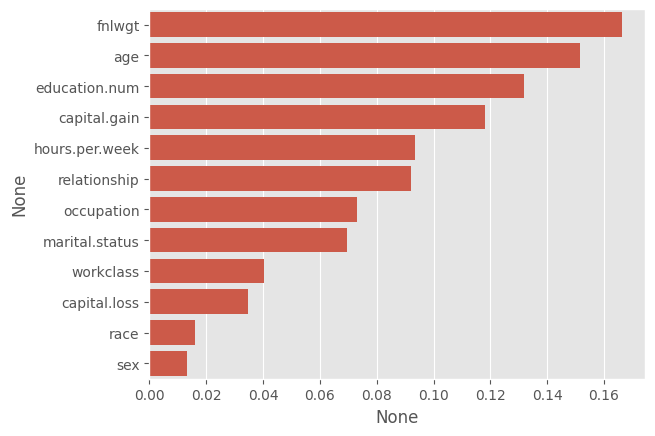

In [ ]:
## 랜덤 포레스트 모델의 특성 중요도 시각화

# 각 특성의 중요도를 시각화할 시리즈 생성
feature_series = pd.Series(data=rf_classifier.feature_importances_, index=train_data.columns)

# 중요도 값 기준으로 내림차순 정렬
feature_series = feature_series.sort_values(ascending=False)

#중요도를 막대그래프로 표현하기 위해 seaborn-barplot 함수 사용
# x에는 중요도 값을, y에는 특성의 이름을 설정
sns.barplot(x=feature_series, y=feature_series.index)

# 그래프 출력

In [ ]:
### 교육(education) 수준 카테고리 재분류

train['education'].replace(['Preschool', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th'], 'LowEducation', inplace=True)
train['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'SomeHigherEd', inplace=True)
train['education'].replace(['Masters', 'Prof-school'], ['Masters', 'Masters'], inplace=True)

### 결혼 상태 (marital.status) 수준 카테고리 재분류

train['marital.status'].replace(['Never.married', 'Married.spouse.absent'], 'UnmarriedStatus', inplace=True)
train['marital.status'].replace(['Married.AF.spouse', 'Married.civ.spouse'], 'Married', inplace=True)
train['marital.status'].replace(['Separated', 'Divorced'], 'MarrigeEnded', inplace=True)

In [ ]:
##나이(age)와 주당 근무시간(hours.per.week)을 곱한 새로운 특성 생성

train['age-hours'] = train['age']*train['hours.per.week']
train.head(3)

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target,age-hours
0,0,32,Private,309513,SomeHigherEd,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,1280
1,1,33,Private,205469,SomeHigherEd,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,1320
2,2,46,Private,149949,SomeHigherEd,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,1840


In [ ]:
### 데이터 분할 및 train/valid 데이터 준비

x = train.drop(['target', 'education'], axis =1)
y = train['target']

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
##결측치 처리와 불필요한 열 제거를 위한 데이터 전처리

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='most_frequent')
x_train[['occupation','workclass']] = imputer.fit_transform(x_train[['occupation', 'workclass']])
x_valid[['occupation','workclass']] = imputer.transform(x_valid[['occupation', 'workclass']])

# 불필요한 열 제거
x_train = x_train.drop(['native.country','id'], axis=1)
x_valid = x_valid.drop(['native.country','id'], axis=1)

In [ ]:
### 범주형 변수 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False)

# 학습 데이터에 대해 fit_transform 실행
x_train_encoded = encoder.fit_transform(x_train[['race', 'sex', 'marital.status']])

# 검증 데이터에 대해 transform 실행
x_valid_encoded = encoder.transform(x_valid[['race', 'sex', 'marital.status']])

In [ ]:
### 원-핫 인코딩된 데이터를 DataFrame으로 변환

x_train_ohe = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(['race', 'sex', 'marital.status']))
x_valid_ohe = pd.DataFrame(x_valid_encoded, columns=encoder.get_feature_names_out(['race', 'sex', 'marital.status']))

x_train_ohe.head(4)

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_MarrigeEnded,marital.status_Never-married,marital.status_Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
### 데이터프레임에 원-핫 인코딩된 특성 추가

x_train = x_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)

x_train = pd.concat([x_train,x_train_ohe], axis=1)
x_valid = pd.concat([x_valid,x_valid_ohe], axis=1)

In [ ]:
### LabelEncoder를 사용한 범주형 데이터 인코딩

for col in x_train.columns:
    if x_train[col].dtype == 'object':

        le = LabelEncoder()
        x_train[col] = le.fit_transform(x_train[col])

        for label in np.unique(x_valid[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        x_valid[col] = le.transform(x_valid[col])

In [ ]:
### StandardScaler를 이용한 데이터 표준화

from sklearn.preprocessing import StandardScaler

features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week', 'age-hours']

scaler = StandardScaler()
x_train[features] = scaler.fit_transform(x_train[features])
x_valid[features] = scaler.transform(x_valid[features])


In [ ]:
### 데이터 차원 축소를 위한 PCA 모델 학습

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

PCA()

In [ ]:
pca.components_[0]

array([-4.62082923e-03,  6.68774550e-03,  2.68687845e-03,  2.72085904e-02,
       -2.27146551e-02,  9.97908854e-01, -3.80327368e-02,  1.26983584e-03,
        1.10451737e-02,  9.27642383e-03,  4.29676828e-03,  2.40445674e-02,
        1.60939943e-02,  7.87309372e-05, -9.83968790e-05, -6.59124275e-04,
        2.86796010e-05,  6.50110615e-04, -1.10451737e-02,  1.10451737e-02,
       -4.84455252e-05,  8.34834167e-03, -3.81146587e-04, -3.24950989e-03,
       -2.79402441e-03, -1.87521526e-03])

In [ ]:
## PCA 주성분의 분산 설명량 확인

# 분산의 설명량 확인
explained_variance_ratio = pca.explained_variance_ratio_

print('explained_variance_ratio: \n',explained_variance_ratio)
print('\nexplained_variance_ratio[0]: ',explained_variance_ratio[0])
print('\nexplained_variance_ratio[1]: ',explained_variance_ratio[1])

explained_variance_ratio: 
 [5.12115213e-01 1.46800588e-01 5.11866476e-02 4.19249968e-02
 3.74000269e-02 3.50721764e-02 3.31984450e-02 3.30960932e-02
 3.00142346e-02 2.84915039e-02 2.62971904e-02 1.20514748e-02
 5.49381003e-03 2.16946334e-03 1.84175573e-03 1.14629984e-03
 6.73689738e-04 5.63949645e-04 3.99896270e-04 6.25450108e-05
 3.67271932e-33 3.67271932e-33 3.67271932e-33 3.67271932e-33
 3.67271932e-33 3.67271932e-33]

explained_variance_ratio[0]:  0.5121152131286719

explained_variance_ratio[1]:  0.14680058761213946


In [ ]:
### 누적 설명량과 주성분 개수 선택

# 누적 설명량 계산
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 적절한 주성분 개수 선택 (예: 95% 이상의 누적 설명량을 가지는 개수)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

In [ ]:
### PCA 모델 재설정 및 데이터 변환

# 선택된 주성분 개수로 PCA 모델 다시 초기화
pca = PCA(n_components=n_components)

# 데이터에 선택된 주성분 개수로 PCA 모델 적용
x_train = pca.fit_transform(x_train)
x_valid = pca.transform(x_valid)

In [ ]:
### RandomForestClassifier 모델을 활용한 데이터 분석 및 성능 평가

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_valid)

macro_f1 = f1_score(y_valid, y_pred, average='macro')
print("Macro F1 스코어:", macro_f1)

Macro F1 스코어: 0.761519615999275


In [ ]:
## 데이터 전처리 및 새로운 특성 생성

import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 교육(education) 수준 카테고리 재분류
train['education'].replace(['Preschool', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th'], 'LowEducation', inplace=True)
train['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'SomeHigherEd', inplace=True)
train['education'].replace(['Masters', 'Prof-school'], ['Masters', 'Masters'], inplace=True)

#결혼 상태 (marital.status) 수준 카테고리 재분류
train['marital.status'].replace(['Never.married', 'Married.spouse.absent'], 'UnmarriedStatus', inplace=True)
train['marital.status'].replace(['Married.AF.spouse', 'Married.civ.spouse'], 'Married', inplace=True)
train['marital.status'].replace(['Separated', 'Divorced'], 'MarriageEnded', inplace=True)

# 나이(age)와 주당 근무시간(hours.per.week)을 곱한 새로운 특성 생성
train['age-hours'] = train['age']*train['hours.per.week']

In [ ]:
### test 데이터에 대한 전처리 및 새로운 특성 생성

# 교육(education) 수준 카테고리 재분류
test['education'].replace(['Preschool', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th'], 'LowEducation', inplace=True)
test['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'SomeHigherEd', inplace=True)
test['education'].replace(['Masters', 'Prof-school'], ['Masters', 'Masters'], inplace=True)

#결혼 상태 (marital.status) 수준 카테고리 재분류
test['marital.status'].replace(['Never.married', 'Married.spouse.absent'], 'UnmarriedStatus', inplace=True)
test['marital.status'].replace(['Married.AF.spouse', 'Married.civ.spouse'], 'Married', inplace=True)
test['marital.status'].replace(['Separated', 'Divorced'], 'MarriageEnded', inplace=True)

# 나이(age)와 주당 근무시간(hours.per.week)을 곱한 새로운 특성 생성
test['age-hours'] = test['age']*test['hours.per.week']

In [ ]:
### 결측치 처리와 불필요한 열 제거

from sklearn.impute import SimpleImputer

# SimpleImputer를 사용하여 결측치를 최빈값으로 보간
imputer = SimpleImputer(strategy='most_frequent')
train[['occupation','workclass']] = imputer.fit_transform(train[['occupation','workclass']])
test[['occupation','workclass']] = imputer.transform(test[['occupation','workclass']])

# 불필요한 열 제거
train = train.drop(['id','native.country'], axis = 1)
test = test.drop(['id','native.country'], axis = 1)

In [ ]:
### 원-핫 인코딩을 사용한 범주형 변수 변환

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
train_encoded = encoder.fit_transform(train[['race', 'sex', 'marital.status']])
test_encoded = encoder.transform(test[['race', 'sex', 'marital.status']])

# 원-핫 인코딩된 데이터를 DataFrame으로 변환
train_ohe = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['race', 'sex', 'marital.status']))
test_ohe = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['race', 'sex', 'marital.status']))

# 데이터프레임에 원-핫 인코딩된 특성 추가
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

train = pd.concat([train,train_ohe], axis=1)
test = pd.concat([test,test_ohe], axis=1)

In [ ]:
### 라벨 인코딩을 사용한 범주형 변수 변환

from sklearn.preprocessing import LabelEncoder
import numpy as np

for col in train.columns:
    if train[col].dtype == 'object':

        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])

        for label in np.unique(test[col]):
            if label not in le.classes_:
                le.classes_ = np.append(le.classes_, label)
        test[col] = le.transform(test[col])

In [ ]:
### StandardScaler를 이용한 데이터 표준화

from sklearn.preprocessing import StandardScaler

features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week', 'age-hours']

scaler = StandardScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [ ]:
### 독립 변수와 종속 변수 분리

train_x = train.drop(['target'],axis = 1)
train_y = train['target']

In [ ]:
### 데이터 차원 축소를 위한 PCA 모델 학습

from sklearn.decomposition import PCA

# PCA 모델 학습
pca = PCA()
pca.fit(train_x)

# 분산의 설명량 확인
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명량과 주성분 개수 선택
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# PCA 모델 재설정 및 데이터 변환
pca = PCA(n_components=n_components)

train_x = pca.fit_transform(train_x)
test = pca.transform(test)

In [ ]:
### GradientBoostingClassifier 모델을 활용한 데이터 분석 및 성능 평가

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

gb_classifier = GradientBoostingClassifier(random_state=30,
                    max_depth=6,
                    min_samples_split=3,
                    max_features=10)

gb_classifier.fit(train_x, train_y)

y_pred = gb_classifier.predict(test)

In [ ]:
### 데이터프레임(DataFrame)을 CSV 파일로 저장하기

submission = pd.read_csv('submission.csv')

submission['target'] = y_pred
submission.to_csv('submission.csv', index=False)